In [1]:
import ontopy;
from ontopy import get_ontology
from ontopy.graph import OntoGraph, cytoscapegraph
import ipywidgets as widgets
import owlready2

print('ontopy imported successfully')
from ontopy import get_ontology

from ontopy import World
world = World()
emmo = world.get_ontology('emmo-inferred').load()
print(f"Ontology IRI: {emmo.base_iri}")

relationship = world.get_ontology('../relationship.ttl').load()
instances = world.get_ontology('../client-eg1.ttl').load()

print(f"Relationship ontology IRI: {relationship.base_iri}")
print(f"Instances ontology IRI: {instances.base_iri}")
print(f"Same IRI? {relationship.base_iri == instances.base_iri}")

# Debug: Check what's actually loaded
print(f"\nDebugging what's loaded:")
print(f"  Relationship classes: {len(list(relationship.classes()))}")
print(f"  Relationship individuals: {len(list(relationship.individuals()))}")
print(f"  Instances classes: {len(list(instances.classes()))}")
print(f"  Instances individuals: {len(list(instances.individuals()))}")

# List all ontologies in the world
print(f"\nOntologies in world:")
for iri, onto in world.ontologies.items():
    classes_count = len(list(onto.classes()))
    individuals_count = len(list(onto.individuals()))
    print(f"  {iri}")
    print(f"    Classes: {classes_count}")
    print(f"    Individuals: {individuals_count}")
    if individuals_count > 0:
        print(f"    Sample individuals: {[ind.name for ind in list(onto.individuals())[:3]]}")

# Access the namespace directly
ns = relationship.get_namespace("http://example.org/owl-client-relationship#")
print(f"\nDirect namespace access:")
try:
    print(f"  Adrian: {ns.Adrian}")
    print(f"  Consultant class: {ns.Consultant}")
except AttributeError as e:
    print(f"  AttributeError: {e}")


# All entities are accessible from either variable
print(f"\nIndividuals from relationship variable:")
for ind in relationship.individuals():
    print(f"  • {ind.name}")

print(f"\nIndividuals from instance variable:")
for ind in instances.individuals():
    print(f"  • {ind.name}")


ontopy imported successfully
Ontology IRI: https://w3id.org/emmo#
Relationship ontology IRI: http://example.org/owl-client-relationship#
Instances ontology IRI: http://example.org/owl-client-relationship/abox#
Same IRI? False

Debugging what's loaded:
  Relationship classes: 6
  Relationship individuals: 2
  Instances classes: 0
  Instances individuals: 8

Ontologies in world:
  http://anonymous/
    Classes: 0
    Individuals: 0
  https://w3id.org/emmo/inferred#
    Classes: 2421
    Individuals: 14
    Sample individuals: ['EMMO_08cb807c_e626_447b_863f_e2835540e918', 'FrancescaBleken', 'FrancescoZaccarini']
  https://w3id.org/emmo#
    Classes: 2421
    Individuals: 14
    Sample individuals: ['EMMO_08cb807c_e626_447b_863f_e2835540e918', 'FrancescaBleken', 'FrancescoZaccarini']
  /workspaces/owl-client-relationship/relationship.ttl#
    Classes: 6
    Individuals: 2
    Sample individuals: ['MCorp', 'Bitovi']
  http://example.org/owl-client-relationship#
    Classes: 6
    Individual

In [2]:
with relationship:
    class Team(relationship.Collection):
        '''Collection of people that form a team'''
    
    class Person(relationship.Interpreter):
        '''A person'''
        
    class SINTEFPerson(relationship.Person):
        '''A person that works at SINTEF'''
    
    class SINTEFIndustryPerson(relationship.SINTEFPerson):
        '''A person that works at SINTEF Industry'''
    
    class SINTEFOceanPerson(relationship.SINTEFPerson):
        '''A person that works at SINTEF Ocean'''
    
    class Researcher(relationship.Person):
       '''A Researcher'''
        
    class Developer(relationship.Person):
       '''A developer'''
    
    class Thomas(relationship.SINTEFOceanPerson):
        '''Ontologist, Software developer, Software architect'''
        annotations = ['A docker enthusiast']
        annotations.append('Plays guitar')
        is_a = [relationship.Developer]
        
    class Jesper(relationship.SINTEFIndustryPerson):
        '''Atom scale modeller, Aluminum expert, Ontologist, EMMO core developer'''
        annotations = ['A kayakiing enthusiast',
                   'Has a biliards table in his living room']
        is_a = [relationship.Researcher]
    
    class Petter(relationship.SINTEFOceanPerson):
        '''Software team manager, developer'''
        annotations = ['Aerospace enthusiast']
        annotations.append('Agile-devops enthusiast')
        annotations.append('A runner and has a cat')
        is_a = [relationship.Developer]
        
    class Treesa(relationship.SINTEFOceanPerson):
        '''Developer'''
        annotations = ['Is a go-kart enthusiast']
        is_a = [relationship.Developer]

    class Sylvain(relationship.SINTEFIndustryPerson):
        '''Ontologist'''
        annotations = ['Is a ping-pong enthusiast']
        is_a = [relationship.Researcher]
        
    class BjornTore(relationship.SINTEFIndustryPerson):
        '''Process chemist'''
        annotations = ['A skiing enthusiast']
        is_a = [relationship.Researcher]
     
    class Francesca(relationship.SINTEFIndustryPerson):
        '''Chemist, Atom scale modeler, Catalysis expert'''
        annotations = ['Has too many hobbies']
        annotations.append('Plays violin')
        annotations.append('Sews, knits, spins, makes pottery')
        is_a = [relationship.Researcher]
        
    class Team40(relationship.Team):
        '''A team that solve all problems 4.0'''
        is_a = [relationship.hasProperPart.some(relationship.Thomas),
                relationship.hasProperPart.some(relationship.Petter),
                relationship.hasProperPart.some(relationship.Treesa),
                relationship.hasProperPart.some(relationship.Jesper),
                relationship.hasProperPart.some(relationship.Sylvain),
                relationship.hasProperPart.some(relationship.BjornTore),
                relationship.hasProperPart.some(relationship.Francesca),
               ]
relationship.sync_attributes(class_docstring='elucidation')
# relationship.sync_attributes(name_policy='uuid', name_prefix='EMMO_')

In [3]:
g = OntoGraph(relationship, relationship.Person, parents=1, relations='all', edgelabels=True, addnodes=True)

print(f"Graph nodes: {len(g.nodes)}")
print(f"Graph edges: {len(g.edges)}")
print("First few nodes:", list(g.nodes)[:5])


Graph nodes: 20
Graph edges: 26
First few nodes: ['ConsultantManager', 'Jesper', 'SINTEFOceanPerson', 'Interpreter', 'Petter']


/usr/local/lib/python3.11/site-packages/ontopy/graph.py:740: UserWarning: Style not defined for relation isInterpretedBy. Resorting to default style.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/ontopy/graph.py:740: UserWarning: Style not defined for relation hasInterpreter. Resorting to default style.
  warnings.warn(


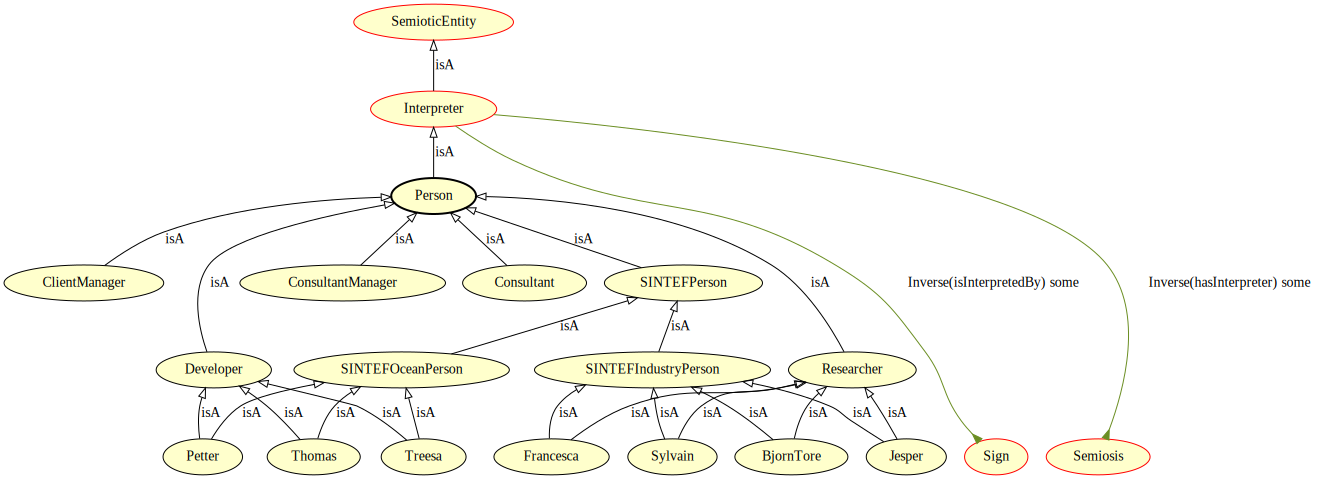

In [4]:
try:
    g.dot.render(format='svg', view=False)
    from IPython.display import SVG, display
    display(SVG(g.dot.pipe(format='svg')))
except:
    print("Graphviz not available, showing source code instead:")
    print(g.dot.source)

In [5]:
g = OntoGraph(relationship, relationship.Person, parents=3, relations='all', edgelabels=True, addnodes=True)
graph = cytoscapegraph(g, onto=relationship)
display(graph)

/usr/local/lib/python3.11/site-packages/ontopy/graph.py:740: UserWarning: Style not defined for relation isInterpretedBy. Resorting to default style.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/ontopy/graph.py:740: UserWarning: Style not defined for relation hasInterpreter. Resorting to default style.
  warnings.warn(


In [6]:
# Debug what's happening with the file loading
import ontopy
from ontopy import World

# Create a fresh world
world = World()

print("🔍 Step 1: Check file contents with basic parsing")
import rdflib
g = rdflib.Graph()
try:
    g.parse('../relationship.ttl', format='turtle')
    print(f"✅ relationship.ttl parsed successfully: {len(g)} triples")
    
    # Find individuals in the RDF graph
    from rdflib import RDF
    individuals = []
    for s, p, o in g.triples((None, RDF.type, None)):
        if str(s).startswith("http://example.org/owl-client-relationship#"):
            individuals.append(str(s).split('#')[-1])
    
    print(f"RDF individuals found: {individuals}")
    
except Exception as e:
    print(f"❌ Error parsing relationship.ttl: {e}")

print("\n🔍 Step 2: Load with ontopy")
try:
    # Load EMMO first
    emmo = world.get_ontology('emmo-inferred').load()
    print(f"✅ EMMO loaded: {emmo.base_iri}")
    
    # Load relationship ontology
    relationship = world.get_ontology('../relationship.ttl').load()
    print(f"✅ Relationship loaded: {relationship.base_iri}")
    
    # Force reload to ensure individuals are picked up
    # relationship.reload()
    
    print(f"After reload:")
    print(f"  Classes: {len(list(relationship.classes()))}")
    print(f"  Individuals: {len(list(relationship.individuals()))}")
    
    # List all classes and individuals
    print(f"\nClasses in relationship:")
    for cls in relationship.classes():
        print(f"  • {cls.name}")
    
    print(f"\nIndividuals in relationship:")
    for ind in relationship.individuals():
        print(f"  • {ind.name}")
    
    # Try accessing individuals directly
    ns = relationship.get_namespace("http://example.org/owl-client-relationship#")
    print(f"\nDirect namespace access:")
    try:
        adrian = ns.Adrian
        print(f"✅ Adrian found: {adrian}")
        print(f"   Type: {type(adrian)}")
        print(f"   Is Individual: {hasattr(adrian, 'is_a')}")
    except AttributeError as e:
        print(f"❌ Adrian not found: {e}")
    
except Exception as e:
    print(f"❌ Error with ontopy loading: {e}")
    import traceback
    traceback.print_exc()

🔍 Step 1: Check file contents with basic parsing
✅ relationship.ttl parsed successfully: 66 triples
RDF individuals found: ['Person', 'Consultant', 'ClientManager', 'Client', 'ConsultantManager', 'Organization', 'hasRelationshipWith', 'reportsTo', 'worksFor', 'managesClient', 'hasConsultantManager', 'hasClientManager', 'Bitovi', 'MCorp', 'Bitovi', 'MCorp']

🔍 Step 2: Load with ontopy
✅ EMMO loaded: https://w3id.org/emmo#
✅ Relationship loaded: http://example.org/owl-client-relationship#
After reload:
  Classes: 6
  Individuals: 2

Classes in relationship:
  • Consultant
  • ConsultantManager
  • Organization
  • Person
  • ClientManager
  • Client

Individuals in relationship:
  • MCorp
  • Bitovi

Direct namespace access:
❌ Adrian not found: No label annotations matches 'Adrian'
